# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a **project aimed to increase revenue from their room bookings**. They believe that they can use data science to help them **reduce the number of cancellations**. This is where you come in! 

They have asked you to use any appropriate methodology to identify **what contributes to whether a booking will be fulfilled or cancelled**. They intend to use the results of your work to **reduce the chance someone cancels their booking**.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

* **Here the Target Variable is booking_status**

In [2]:
import pandas as pd
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

### Importing the Required Libraries

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [4]:
hotels.shape
# There are 36275 records and 19 columns

(36275, 19)

In [5]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [6]:
hotels.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3905
no_of_special_requests                      6
booking_status                              2
dtype: int64

* The attributes like no_of_adults,no_of_children,no_of_weekend_nights,no_of_previous_cancellations ,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,lead_time are numerical in nature  

In [8]:
num_cols=hotels.select_dtypes(include=np.number).columns
cat_cols=hotels.select_dtypes(include=np.object).columns

In [9]:
print(len(num_cols))
num_cols
# Attributes like 'required_car_parking_space','repeated_guest' are categoric,as its already encoded so its fall into numeric but,i have to change its dtype to object to treated as a categorical features

14


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [10]:
print(len(cat_cols))
cat_cols
# Booking_id is a redundant features which contains unique values so i will remove it before proceeding to furhter analysis

5


Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [11]:
cat_cols=['required_car_parking_space','repeated_guest','type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status']
num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [12]:
len(num_cols)

12

### Univariate Analysis

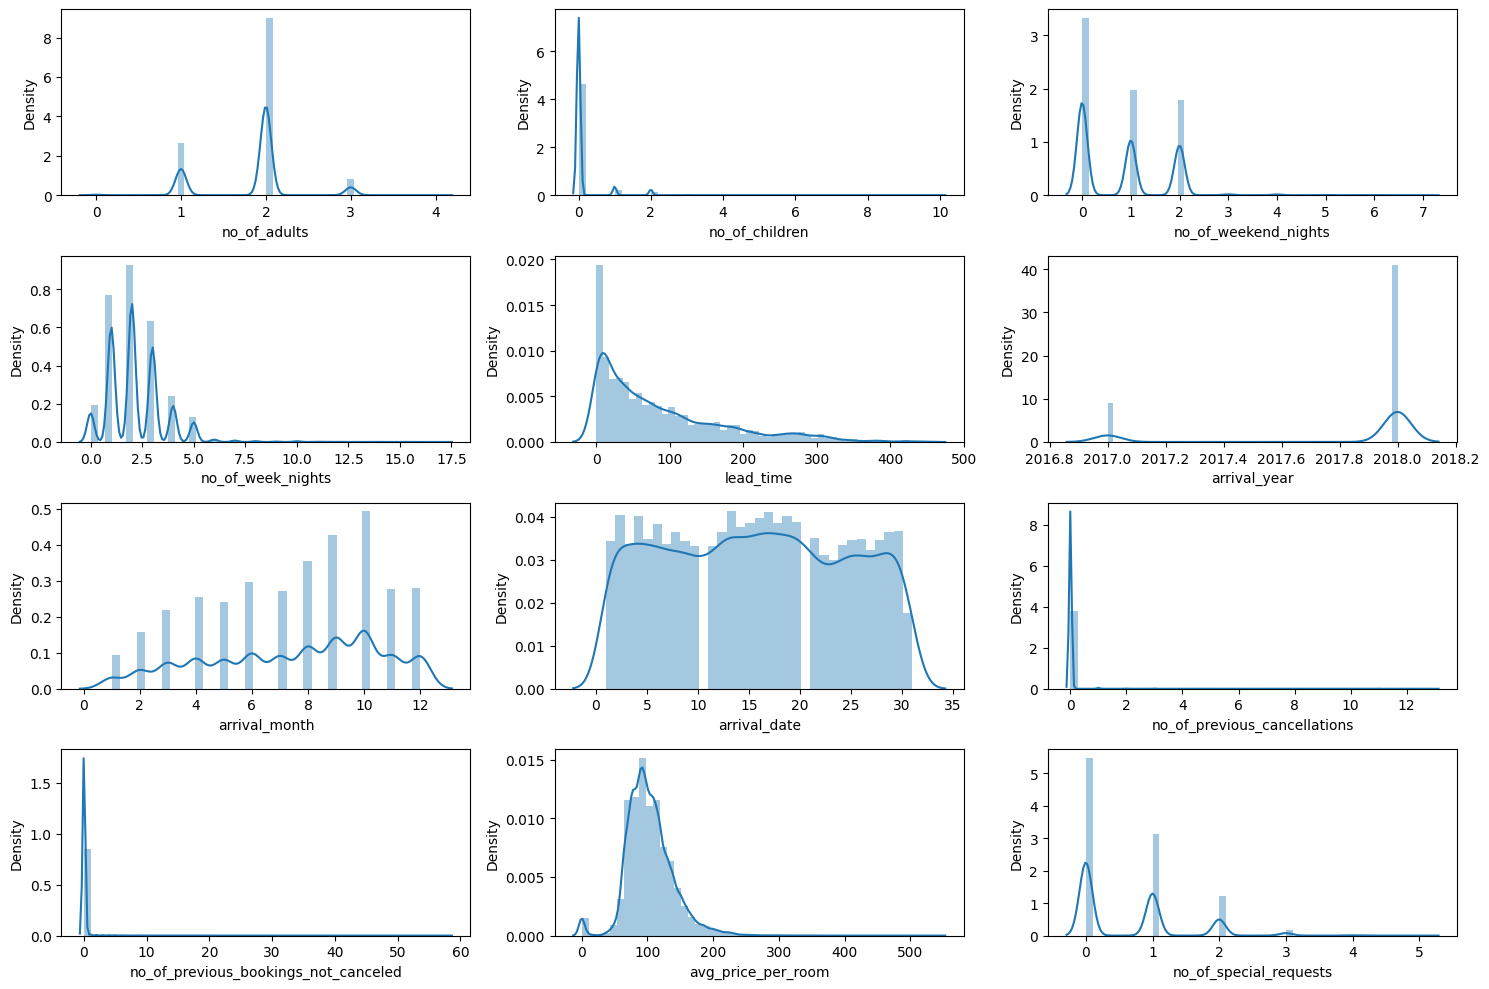

In [13]:

nrows=4
ncols=3
rep=1
plt.figure(figsize=(15,10))
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(hotels[i])
    rep+=1
plt.tight_layout()
plt.show()

# Observation from the above Analysis:
* Number of adult show multimodal distribution and At 2 the frequency is high.
* Most of the customersto the hotel have no children because at 0 the frequency is high and maximum children that a customers having is 10
* 

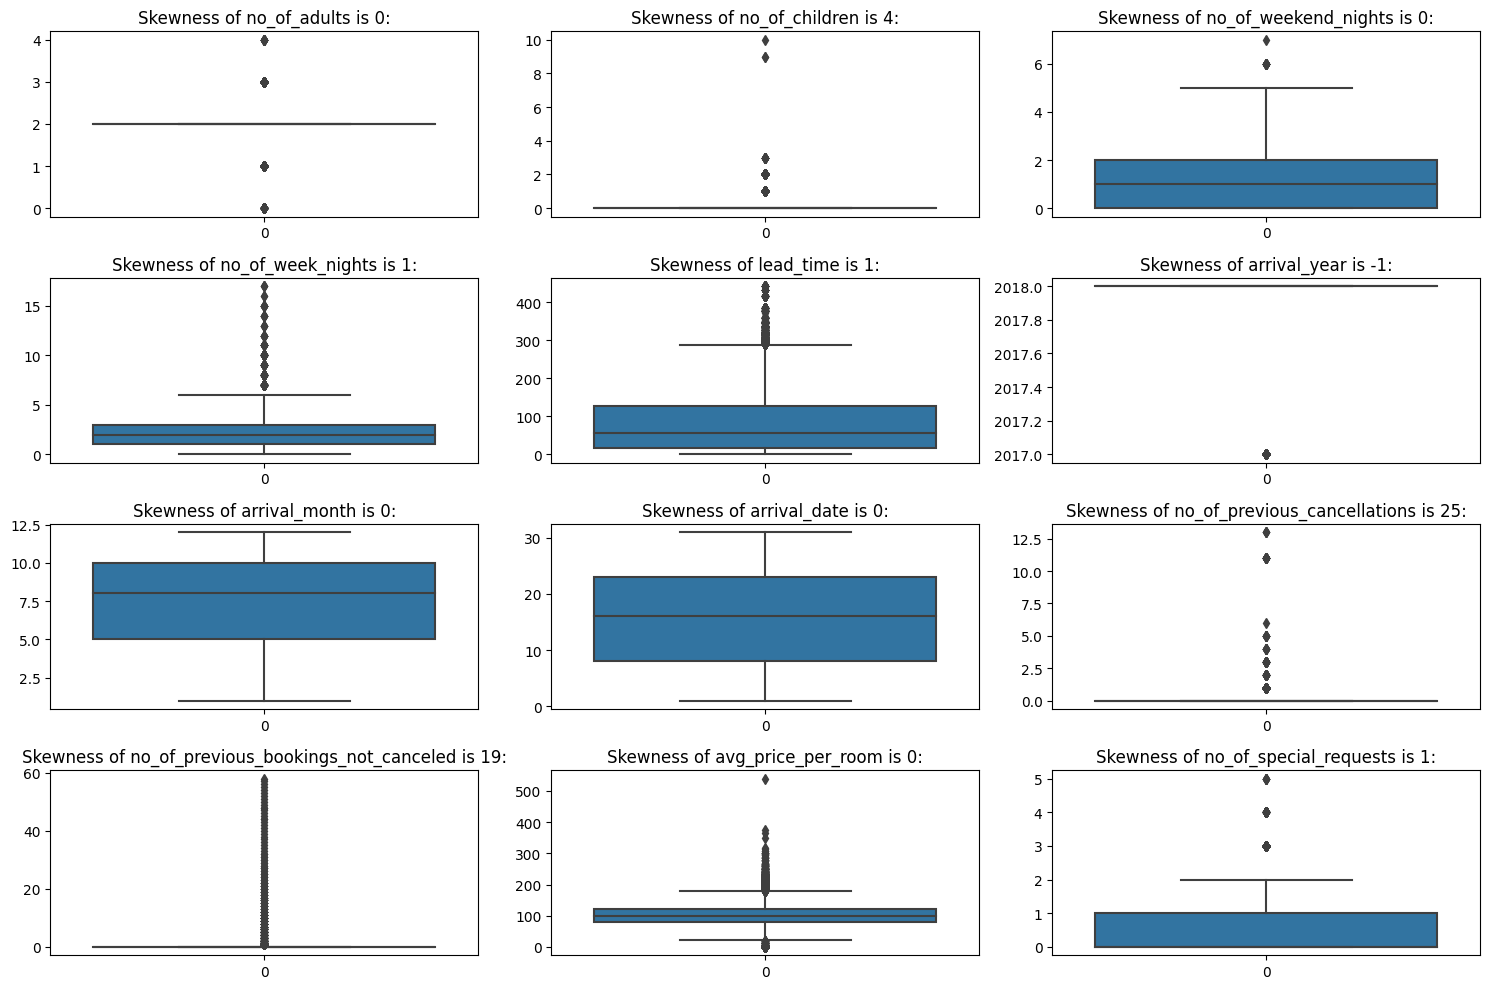

In [14]:
# Box Plot
nrows=4
ncols=3
rep=1
plt.figure(figsize=(15,10))
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(hotels[i])
    plt.title('Skewness of %s is %d:'%(i, hotels[i].skew()))
    rep+=1
plt.tight_layout()
plt.show()

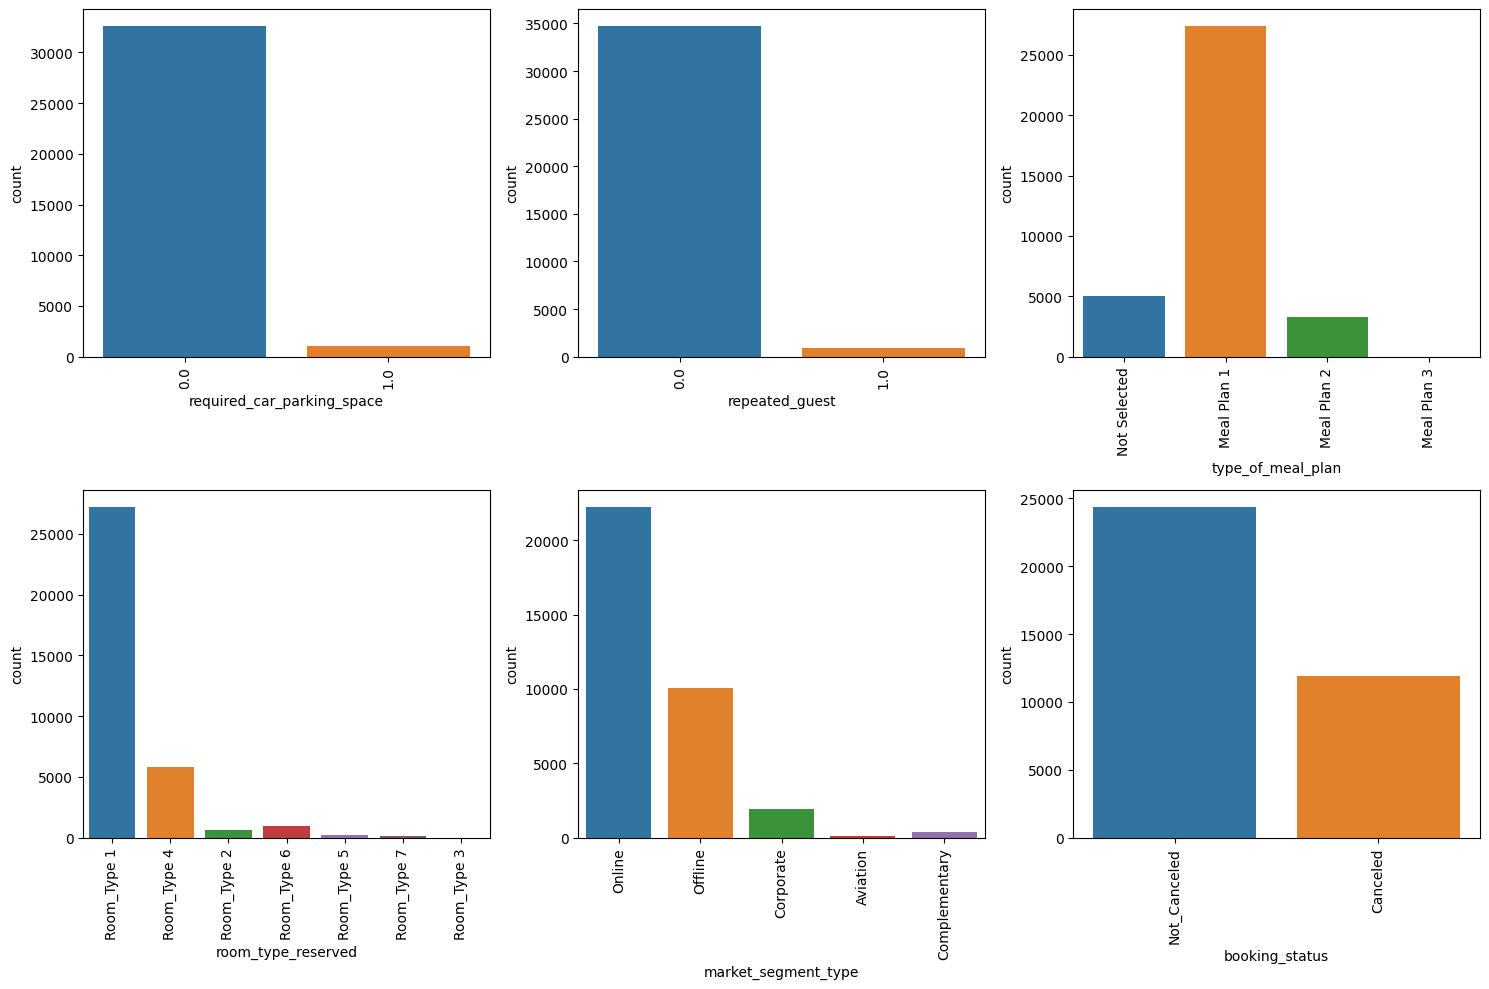

In [15]:
# Univariate Analysis of Categorical columns
nrows=2
ncols=3
rep=1
plt.figure(figsize=(15,10))
for i in cat_cols:
    plt.subplot(nrows,ncols,rep)
    sns.countplot(x=i, data=hotels)
    plt.xticks(rotation=90)
    rep+=1
plt.tight_layout()
plt.show()

### Bivariate Analysis

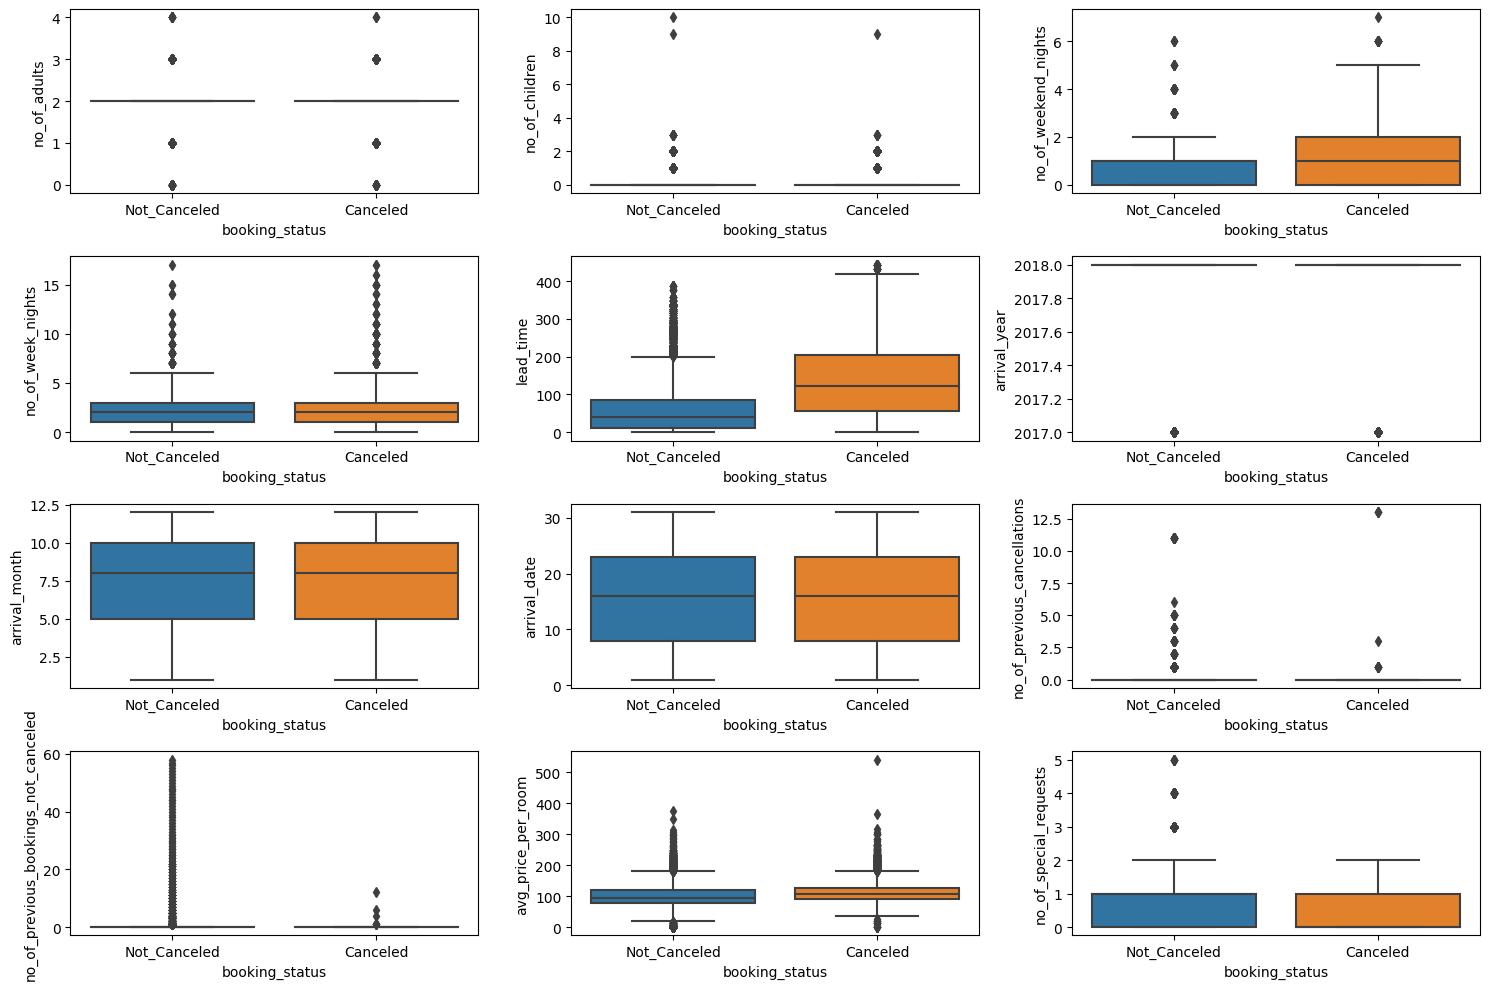

In [16]:
# Bivariate Analysis(Numeric VS Target)
nrows=4
ncols=3
rep=1
plt.figure(figsize=(15,10))
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(x=hotels.booking_status,y=hotels[i])
    rep+=1
plt.tight_layout()
plt.show()

In [17]:
hotels.groupby(['booking_status'])['no_of_previous_bookings_not_canceled'].sum()

booking_status
Canceled          26.0
Not_Canceled    5492.0
Name: no_of_previous_bookings_not_canceled, dtype: float64

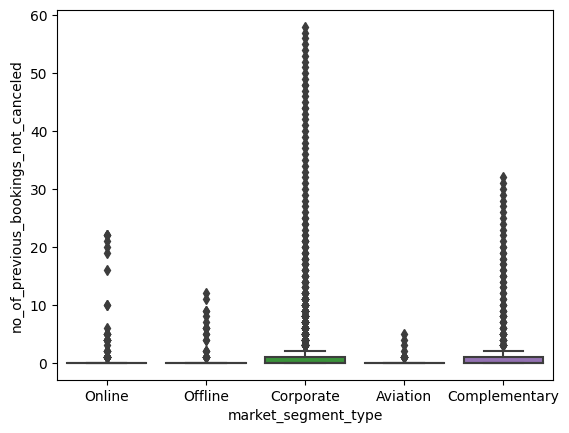

In [18]:
# Lets check the number of previous booking canceled wrt to diffrent market segment
sns.boxplot(x=hotels.market_segment_type,y=hotels.no_of_previous_bookings_not_canceled)
plt.show()
# As in data dictionary its written that the attribute no_of_previous_booking_not_canceled is refer to booking that were canceled previously

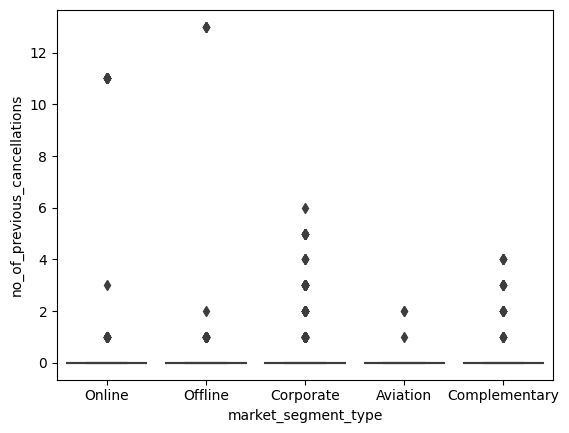

In [19]:
# Lets check the number of previous cancellation wrt to diffrent market segment
sns.boxplot(x=hotels.market_segment_type,y=hotels.no_of_previous_cancellations)
plt.show()

In [20]:
hotels.groupby(['market_segment_type'])['no_of_previous_cancellations'].sum()

market_segment_type
Aviation           5.0
Complementary     76.0
Corporate        323.0
Offline          116.0
Online           306.0
Name: no_of_previous_cancellations, dtype: float64

In [21]:
hotels.groupby(['booking_status'])['no_of_special_requests'].nunique()
# canceled booking has few number of special requests

booking_status
Canceled        3
Not_Canceled    6
Name: no_of_special_requests, dtype: int64

In [22]:
hotels.groupby(['booking_status'])['avg_price_per_room'].mean()
# Canceled room has high avg_price_per_room

booking_status
Canceled        110.599846
Not_Canceled     99.926330
Name: avg_price_per_room, dtype: float64

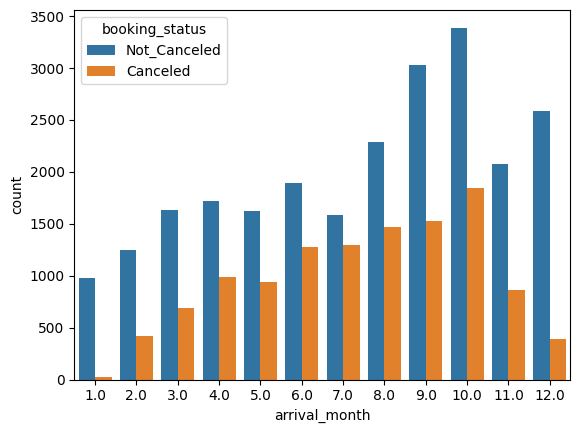

In [23]:
# Arrival Month Vs Booking Status
sns.countplot(x=hotels.arrival_month,hue=hotels.booking_status)
plt.show()
# The proportion of booking has been canceled with comaparision with Not Canceled is high in July Month(07)

In [24]:
hotels.groupby(['arrival_month'])['booking_status'].value_counts().sort_values(ascending=False)

arrival_month  booking_status
10.0           Not_Canceled      3389
9.0            Not_Canceled      3026
12.0           Not_Canceled      2583
8.0            Not_Canceled      2292
11.0           Not_Canceled      2073
6.0            Not_Canceled      1889
10.0           Canceled          1849
4.0            Not_Canceled      1716
3.0            Not_Canceled      1635
5.0            Not_Canceled      1623
7.0            Not_Canceled      1587
9.0            Canceled          1524
8.0            Canceled          1469
7.0            Canceled          1300
6.0            Canceled          1273
2.0            Not_Canceled      1244
4.0            Canceled           984
1.0            Not_Canceled       976
5.0            Canceled           940
11.0           Canceled           864
3.0            Canceled           693
2.0            Canceled           424
12.0           Canceled           394
1.0            Canceled            24
Name: booking_status, dtype: int64

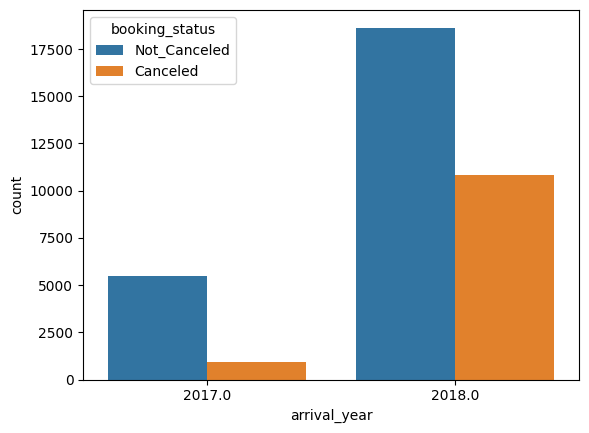

In [25]:
# Arrival Year Vs Booking Status
sns.countplot(x=hotels.arrival_year,hue=hotels.booking_status)
plt.show()
# Most of the booking has been made and also canceled in 2018 as comapred to 2017

* Thos who planned/booked for higher number weekend nights has a high chance of cancel the booking
* From no_of_week_nights with the Target nothing difference can be seen from the above plot
* Those who booked the hotesl from a very long back period of time has a high chance of cancel the ticket as seen from the plot(leadtime vs Target)
* From arrival_year,arrival_month,arrival_date i can not see any pattern clearly with the taget
* Higher the avg_price_room chance of getting cancel the tickets is high as seen from the above plot
* Thos who request maximum special features/services at the time of booking has a less chance of canceled the ticket as compare to the other ones.

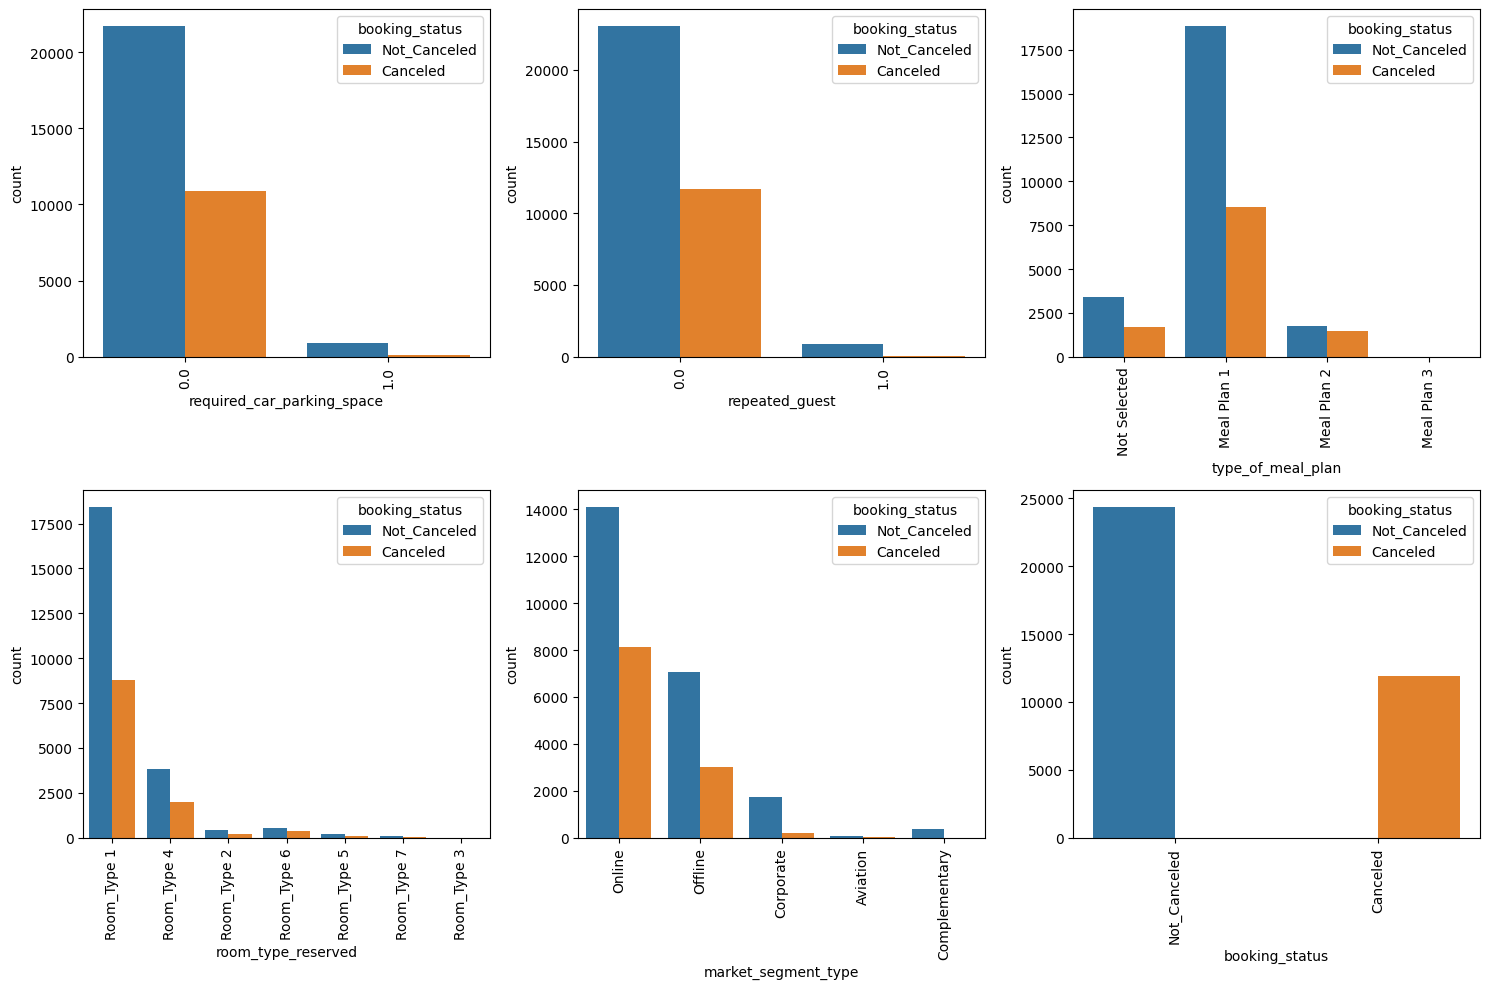

In [26]:
# Bivariate Analysis(Category VS Target)
nrows=2
ncols=3
rep=1
plt.figure(figsize=(15,10))
for i in cat_cols:
    plt.subplot(nrows,ncols,rep)
    sns.countplot(x=i,data=hotels,hue='booking_status')
    plt.xticks(rotation=90)
    rep+=1
plt.tight_layout()
plt.show()

In [27]:
hotels.groupby(['booking_status'])['market_segment_type'].value_counts(normalize=True)

booking_status  market_segment_type
Canceled        Online                 0.713973
                Offline                0.264989
                Corporate              0.017882
                Aviation               0.003156
Not_Canceled    Online                 0.604539
                Offline                0.301991
                Corporate              0.073732
                Complementary          0.016057
                Aviation               0.003682
Name: market_segment_type, dtype: float64

In [28]:
hotels.groupby(['booking_status'])['room_type_reserved'].value_counts(normalize=True)

booking_status  room_type_reserved
Canceled        Room_Type 1           0.763730
                Room_Type 4           0.173618
                Room_Type 6           0.034411
                Room_Type 2           0.018943
                Room_Type 5           0.006083
                Room_Type 7           0.003041
                Room_Type 3           0.000174
Not_Canceled    Room_Type 1           0.781700
                Room_Type 4           0.163290
                Room_Type 6           0.023012
                Room_Type 2           0.018902
                Room_Type 5           0.007883
                Room_Type 7           0.005043
                Room_Type 3           0.000170
Name: room_type_reserved, dtype: float64

* The proportion of canceled the booking is high at which who doest not required car parking space
* The proportion of canceled the booking is high at which who doest not a repeated guset
* Type_of_meal_plan_2 has a high proportion of canceled the booking
* Most of the booking has been maid online and also the online booking has high proportion of cancellation as compare to others segement
* 


### Missing Value

In [29]:

(hotels.isnull().sum()/hotels.shape[0])*100

Booking_ID                              0.000000
no_of_adults                            1.138525
no_of_children                          0.893177
no_of_weekend_nights                    1.011716
no_of_week_nights                       2.224673
type_of_meal_plan                       1.450034
required_car_parking_space              7.145417
room_type_reserved                      3.228119
lead_time                               1.301172
arrival_year                            1.042040
arrival_month                           1.389387
arrival_date                            2.704342
market_segment_type                     4.168160
repeated_guest                          1.615438
no_of_previous_cancellations            1.370090
no_of_previous_bookings_not_canceled    1.516196
avg_price_per_room                      1.268091
no_of_special_requests                  2.175052
booking_status                          0.000000
dtype: float64

In [30]:
hotels.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,35862.000000,35951.000000,35908.000000,35468.00000,35749,33683.000000,35104,35803.000000,35897.000000,35771.000000,35294.000000,34763,35689.000000,35778.000000,35725.000000,35815.000000,35486.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27421,NaN,27234,NaN,NaN,NaN,NaN,22264,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.845017,0.105366,0.810209,2.20331,NaN,0.030698,NaN,85.276569,2017.820431,7.424031,15.605712,NaN,0.025666,0.023646,0.154458,103.418207,0.619343,NaN
std,NaN,0.518652,0.402871,0.870857,1.40989,NaN,0.172501,NaN,85.998845,0.383834,3.068277,8.743484,NaN,0.158140,0.370835,1.764805,35.057342,0.785849,NaN
min,NaN,0.000000,0.000000,0.000000,0.00000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.00000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.00000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.00000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [31]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [32]:
for i in hotels.columns:
    if i in num_cols:
        hotels[i]=hotels[i].fillna(hotels[i].median())
    elif  i in cat_cols:
        hotels[i]=hotels[i].fillna(hotels[i].mode()[0])


In [33]:
hotels.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Lets perform some statistical test to find out which features are important for the analysis and which are not

In [34]:
# Numeric Vs Target
# As the Target columns is only two class so i will perform two sample T-test

for i in num_cols:
    sample_1=hotels.groupby(['booking_status'])[i].apply(list)[0]
    sample_2=hotels.groupby(['booking_status'])[i].apply(list)[1]
    ttest,p_value=stats.ttest_ind(sample_1,sample_2)
    print('The P Value of %s is %.2f'%(i,p_value))
# Except arrival date all other features has some realtion with target as we can see statistically

The P Value of no_of_adults is 0.00
The P Value of no_of_children is 0.00
The P Value of no_of_weekend_nights is 0.00
The P Value of no_of_week_nights is 0.00
The P Value of lead_time is 0.00
The P Value of arrival_year is 0.00
The P Value of arrival_month is 0.02
The P Value of arrival_date is 0.08
The P Value of no_of_previous_cancellations is 0.00
The P Value of no_of_previous_bookings_not_canceled is 0.00
The P Value of avg_price_per_room is 0.00
The P Value of no_of_special_requests is 0.00


In [35]:
cat_cols

['required_car_parking_space',
 'repeated_guest',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [36]:
# Catgoric VS Target
for i in cat_cols[:-1]:
    table=pd.crosstab(hotels[i],hotels.booking_status)
    ttest,pvalue,dof,exp_value=stats.chi2_contingency(table)
    print('The Pvalue of %s is %.2f'%(i,pvalue))

The Pvalue of required_car_parking_space is 0.00
The Pvalue of repeated_guest is 0.00
The Pvalue of type_of_meal_plan is 0.00
The Pvalue of room_type_reserved is 0.00
The Pvalue of market_segment_type is 0.00


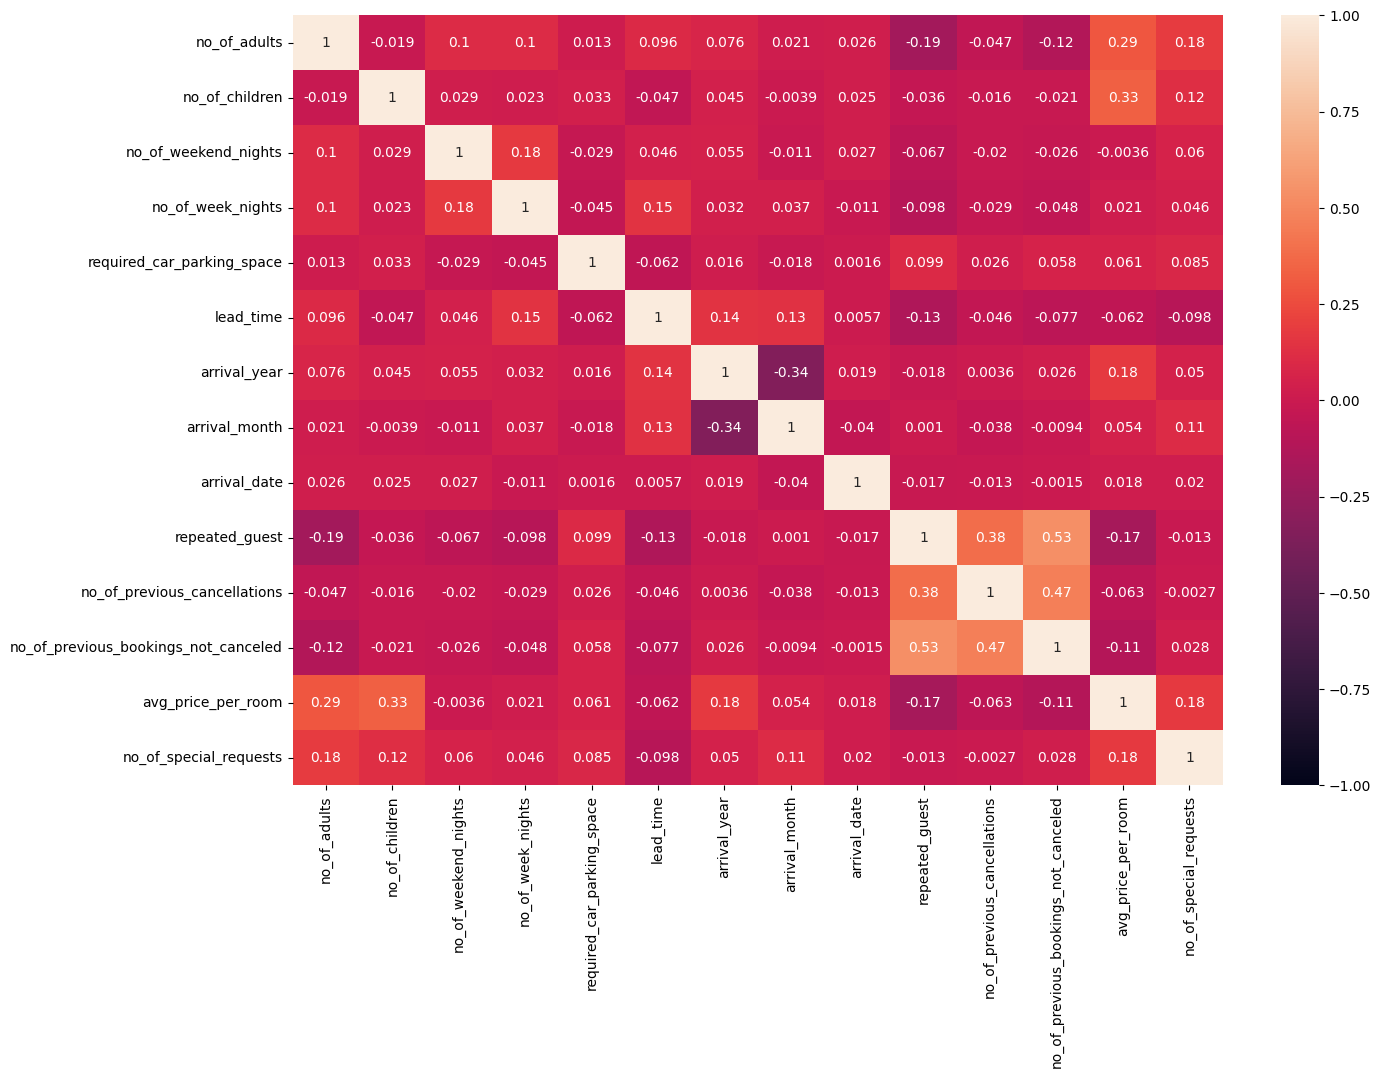

In [37]:

plt.figure(figsize=(15,10))
sns.heatmap(hotels.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

### Encoding

In [38]:
#  Frequency Encoding to Type_of_meal_plan
dict_1=hotels.type_of_meal_plan.value_counts().to_dict()
new_data=hotels.copy()
new_data.type_of_meal_plan=new_data.type_of_meal_plan.map(dict_1)

In [39]:
# Frequency Encoding to room_type_reserved
dict_2=hotels.room_type_reserved.value_counts().to_dict()
new_data.room_type_reserved=new_data.room_type_reserved.map(dict_2)

In [40]:
# Frequency Encoding to market_segment_type
dict_2=hotels.market_segment_type.value_counts().to_dict()
new_data.market_segment_type=new_data.market_segment_type.map(dict_2)

In [41]:
# Lets Map 0= Not_canceled and 1= Canceled
new_data.booking_status=new_data.booking_status.map({'Not_Canceled':0,'Canceled':1})

In [42]:
new_data.drop(columns=['Booking_ID'],inplace=True)

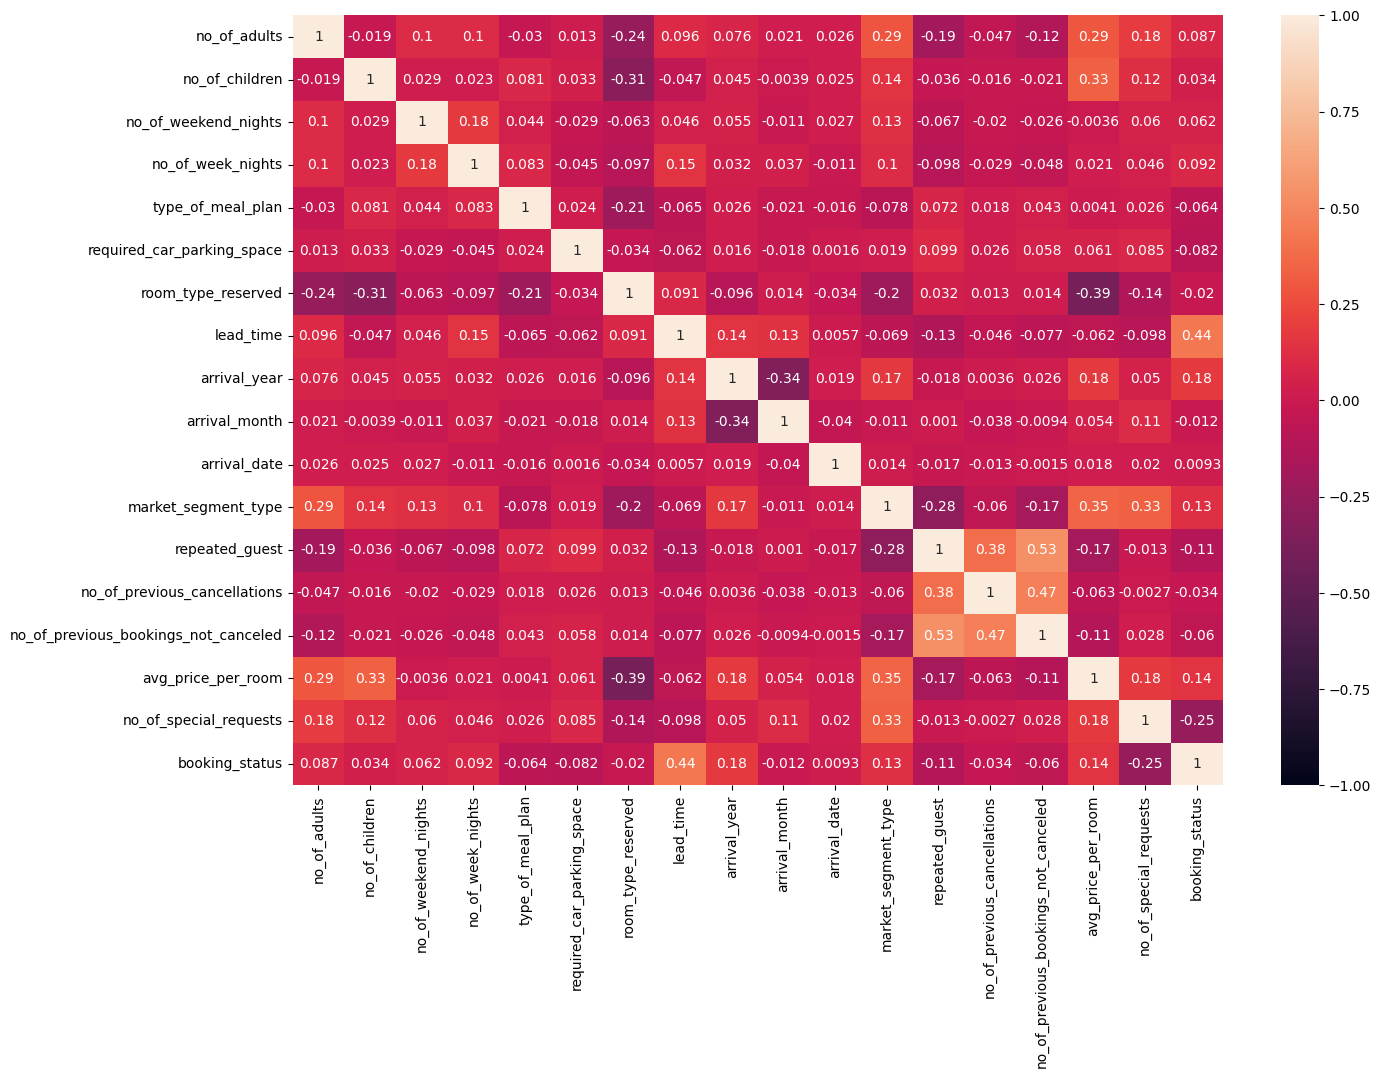

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(new_data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

### Scaling the Data

In [44]:
# Lets scaled all the Numeric Data into one scale
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in num_cols:
    if i not in ('arrival_year','arrival_month','arrival_date'):
        new_data[i]=pt.fit_transform(pd.DataFrame(new_data[i]))



In [45]:
new_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,36275.000000,36275.000000,36275.000000,3.627500e+04,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,36275.000000
mean,5.492383e-16,-1.189951e-16,-4.661866e-17,-4.480680e-17,22529.974886,0.028504,23225.089759,-1.304539e-16,2017.822302,7.432033,15.616375,18489.012736,0.025252,3.016501e-17,2.742274e-18,-5.770528e-16,9.245380e-17,0.327636
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,9932.450569,0.166411,9896.833784,1.000014e+00,0.382264,3.047632,8.624680,7554.776635,0.156890,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.469358
min,-2.993224e+00,-2.822149e-01,-1.035446e+00,-2.191506e+00,5.000000,0.000000,6.000000,-1.939059e+00,2017.000000,1.000000,1.000000,122.000000,0.000000,-9.683626e-02,-1.503620e-01,-3.376310e+00,-8.806294e-01,0.000000
25%,2.578839e-01,-2.822149e-01,-1.035446e+00,-8.855374e-01,27947.000000,0.000000,28405.000000,-7.591271e-01,2018.000000,5.000000,8.000000,10076.000000,0.000000,-9.683626e-02,-1.503620e-01,-6.290497e-01,-8.806294e-01,0.000000
50%,2.578839e-01,-2.822149e-01,5.203108e-01,3.189332e-03,27947.000000,0.000000,28405.000000,5.128705e-02,2018.000000,8.000000,16.000000,23776.000000,0.000000,-9.683626e-02,-1.503620e-01,-8.589813e-02,-8.806294e-01,0.000000
75%,2.578839e-01,-2.822149e-01,1.261601e+00,6.971710e-01,27947.000000,0.000000,28405.000000,7.490297e-01,2018.000000,10.000000,23.000000,23776.000000,0.000000,-9.683626e-02,-1.503620e-01,4.945796e-01,9.223228e-01,1.000000
max,4.960315e+00,3.543440e+00,2.655342e+00,5.381138e+00,27947.000000,1.000000,28405.000000,2.245782e+00,2018.000000,12.000000,31.000000,23776.000000,1.000000,1.032671e+01,6.650615e+00,1.077073e+01,1.927029e+00,1.000000


In [46]:
new_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.257884,-0.282215,0.520311,0.003189,27947,0.0,28405,0.051287,2018.0,8.0,16.0,23776,0.0,-0.096836,-0.150362,-0.085898,-0.880629,0
1,0.257884,-0.282215,1.261601,0.697171,5057,0.0,28405,-1.318491,2018.0,11.0,6.0,23776,0.0,-0.096836,-0.150362,0.120101,0.922323,0
2,-1.584918,-0.282215,1.261601,-0.885537,27947,0.0,28405,-1.733893,2018.0,2.0,28.0,23776,0.0,-0.096836,-0.150362,-1.253268,-0.880629,1
3,0.257884,-0.282215,-1.035446,0.003189,27947,0.0,28405,1.306180,2018.0,5.0,20.0,23776,0.0,-0.096836,-0.150362,-0.070155,-0.880629,1
4,0.257884,-0.282215,0.520311,-0.885537,5057,0.0,28405,-0.081921,2018.0,4.0,11.0,23776,0.0,-0.096836,-0.150362,-0.228151,-0.880629,1


In [47]:
X=new_data.drop(columns=['booking_status'])
y=new_data.booking_status
print(X.shape)
print(y.shape)

(36275, 17)
(36275,)


### Model Building

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=10,test_size=0.20)

In [49]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((29020, 17), (29020,), (7255, 17), (7255,))

### Logistic Regression

Accuracy: 0.7739490006891798
F1 score: 0.620194534506716
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      4878
           1       0.69      0.56      0.62      2377

    accuracy                           0.77      7255
   macro avg       0.75      0.72      0.73      7255
weighted avg       0.77      0.77      0.77      7255


ROC AUC CURVE


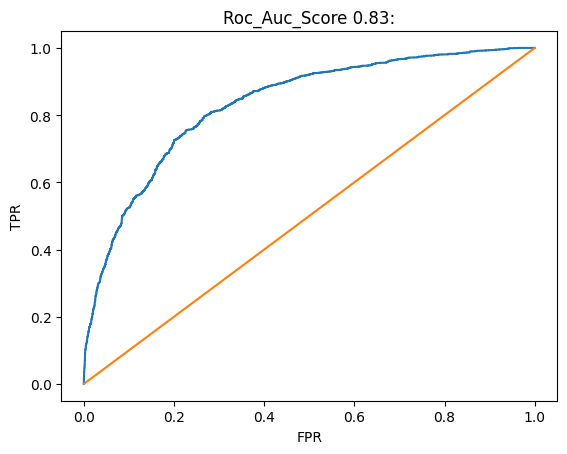

In [50]:
# Lets Build A Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score,roc_auc_score,roc_curve
lr=LogisticRegression()
model_lr=lr.fit(xtrain,ytrain)
y_pred_lr=model_lr.predict(xtest)
y_pred_lr_proba=model_lr.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_lr))
print('F1 score:',f1_score(ytest,y_pred_lr))
print('Classification Report:\n',classification_report(ytest,y_pred_lr))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_lr_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_lr_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Decission Tree

Accuracy: 0.8576154376292212
F1 score: 0.7846570773400043
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4878
           1       0.78      0.79      0.78      2377

    accuracy                           0.86      7255
   macro avg       0.84      0.84      0.84      7255
weighted avg       0.86      0.86      0.86      7255


ROC AUC CURVE


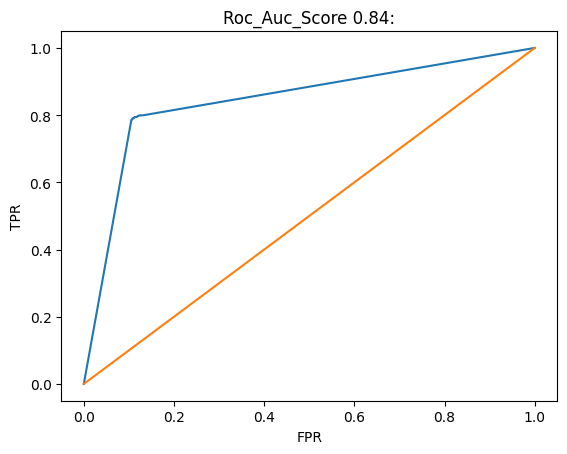

In [51]:
# Lets Build A Decission Tree Model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=10)
model_dt=dt.fit(xtrain,ytrain)
y_pred_dt=model_dt.predict(xtest)
y_pred_dt_proba=model_dt.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_dt))
print('F1 score:',f1_score(ytest,y_pred_dt))
print('Classification Report:\n',classification_report(ytest,y_pred_dt))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_dt_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_dt_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [52]:
# Lets Tuned the Above decission tree Model to Find out Best Parameters
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],'max_depth':np.arange(5,20),'min_samples_split':np.arange(1,7)}
grid=GridSearchCV(estimator=model_dt,param_grid=params,scoring='f1',cv=5)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6])},
             scoring='f1')

In [53]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 5}

Accuracy: 0.8656099241902137
F1 score: 0.7912652536929993
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4878
           1       0.81      0.78      0.79      2377

    accuracy                           0.87      7255
   macro avg       0.85      0.84      0.85      7255
weighted avg       0.86      0.87      0.86      7255


ROC AUC CURVE


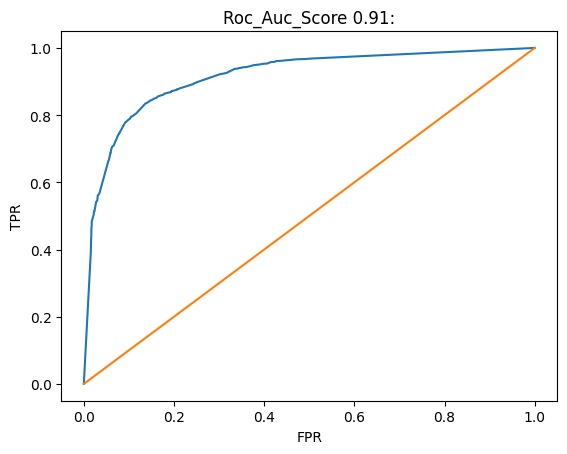

In [54]:
# Tuned Decission Tree
dt=DecisionTreeClassifier(random_state=10,criterion='gini',max_depth=13,min_samples_split=5)
model_dt=dt.fit(xtrain,ytrain)
y_pred_dt=model_dt.predict(xtest)
y_pred_dt_proba=model_dt.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_dt))
print('F1 score:',f1_score(ytest,y_pred_dt))
print('Classification Report:\n',classification_report(ytest,y_pred_dt))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_dt_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_dt_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Random Forest

Accuracy: 0.8997932460372157
F1 score: 0.841231709980345
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      4878
           1       0.87      0.81      0.84      2377

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255


ROC AUC CURVE


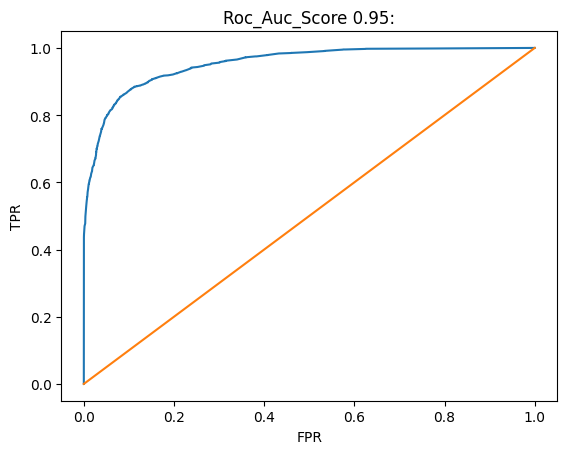

In [69]:
# Lets Apply Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=10)
model_rf=rf.fit(xtrain,ytrain)
y_pred_rf=model_rf.predict(xtest)
y_pred_rf_proba=model_rf.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_rf))
print('F1 score:',f1_score(ytest,y_pred_rf))
print('Classification Report:\n',classification_report(ytest,y_pred_rf))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_rf_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_rf_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

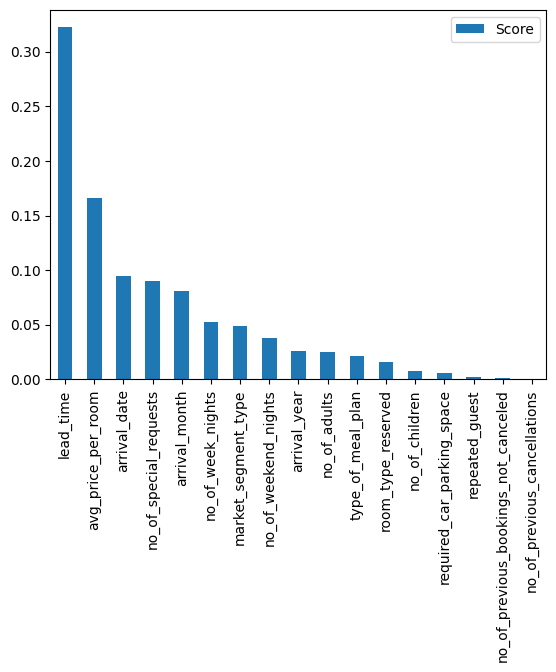

In [56]:
# Lets Findout the Feature Importance
pd.DataFrame(model_rf.feature_importances_,index=xtrain.columns,columns=['Score']).sort_values(by='Score',ascending=False).plot(kind='bar')
plt.show()

Accuracy: 0.881736733287388
F1 score: 0.8118421052631579
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      4878
           1       0.85      0.78      0.81      2377

    accuracy                           0.88      7255
   macro avg       0.87      0.86      0.86      7255
weighted avg       0.88      0.88      0.88      7255


ROC AUC CURVE


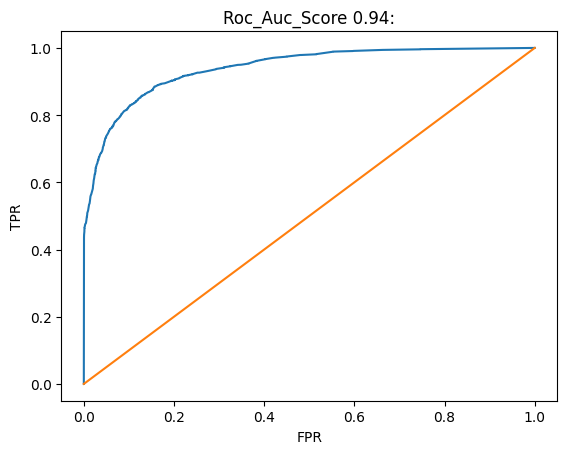

In [57]:
# Lets take top_5 features contributing the most for the prediction and see the result
new_xtrain=xtrain[['lead_time','avg_price_per_room','arrival_date','no_of_special_requests','arrival_month']]
new_xtest=xtest[['lead_time','avg_price_per_room','arrival_date','no_of_special_requests','arrival_month']]
model_rf=rf.fit(new_xtrain,ytrain)
y_pred_rf=model_rf.predict(new_xtest)
y_pred_rf_proba=model_rf.predict_proba(new_xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_rf))
print('F1 score:',f1_score(ytest,y_pred_rf))
print('Classification Report:\n',classification_report(ytest,y_pred_rf))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_rf_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_rf_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Ada Boost

Accuracy: 0.8130944176430048
F1 score: 0.6981300089047195
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      4878
           1       0.74      0.66      0.70      2377

    accuracy                           0.81      7255
   macro avg       0.79      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255


ROC AUC CURVE


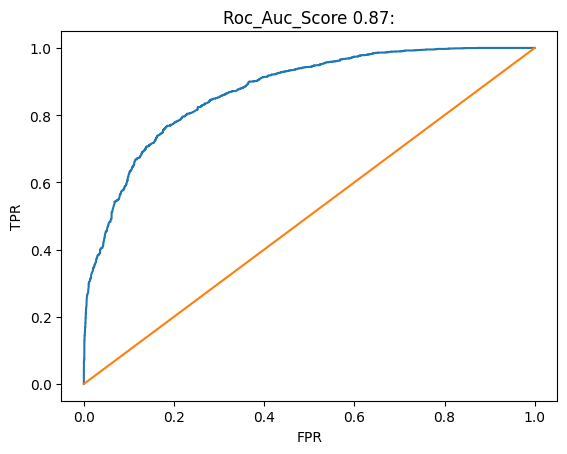

In [58]:
# Lets Apply Diffrent Ensembel Model
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=10)
model_ada=ada.fit(xtrain,ytrain)
y_pred_ada=model_ada.predict(xtest)
y_pred_ada_proba=model_ada.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_ada))
print('F1 score:',f1_score(ytest,y_pred_ada))
print('Classification Report:\n',classification_report(ytest,y_pred_ada))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_ada_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_ada_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Gradient Boosting

Accuracy: 0.839696760854583
F1 score: 0.7361016564556387
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.88      4878
           1       0.80      0.68      0.74      2377

    accuracy                           0.84      7255
   macro avg       0.83      0.80      0.81      7255
weighted avg       0.84      0.84      0.84      7255


ROC AUC CURVE


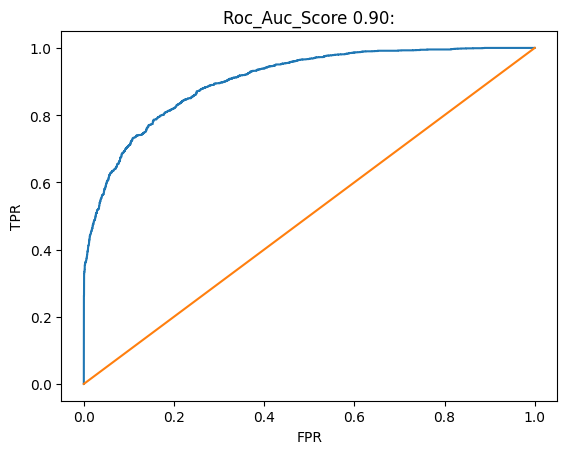

In [60]:
# Lets apply Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
model_gbm=gbm.fit(xtrain,ytrain)
y_pred_gbm=model_gbm.predict(xtest)
y_pred_gbm_proba=model_gbm.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_gbm))
print('F1 score:',f1_score(ytest,y_pred_gbm))
print('Classification Report:\n',classification_report(ytest,y_pred_gbm))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_gbm_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_gbm_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### LGBM

Accuracy: 0.8749827705031014
F1 score: 0.7993806679938067
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4878
           1       0.84      0.76      0.80      2377

    accuracy                           0.87      7255
   macro avg       0.87      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255


ROC AUC CURVE


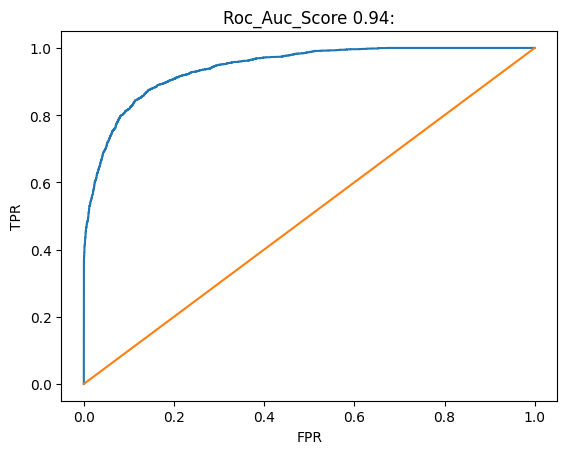

In [61]:
# Lets apply LGBM classifier
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
model_lgbm=lgbm.fit(xtrain,ytrain)
y_pred_lgbm=model_lgbm.predict(xtest)
y_pred_lgbm_proba=model_lgbm.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_lgbm))
print('F1 score:',f1_score(ytest,y_pred_lgbm))
print('Classification Report:\n',classification_report(ytest,y_pred_lgbm))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_lgbm_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_lgbm_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### XGBoost

Accuracy: 0.8840799448656099
F1 score: 0.8167356722597516
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      4878
           1       0.85      0.79      0.82      2377

    accuracy                           0.88      7255
   macro avg       0.87      0.86      0.87      7255
weighted avg       0.88      0.88      0.88      7255


ROC AUC CURVE


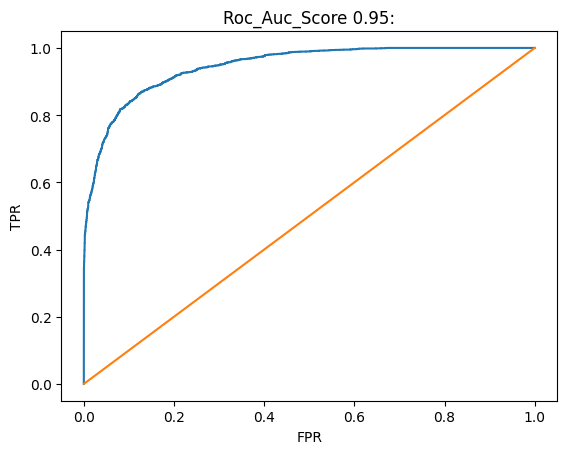

In [63]:
# Lets apply XgBoost
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_xgb=xgb.fit(xtrain,ytrain)
y_pred_xgb=model_xgb.predict(xtest)
y_pred_xgb_proba=model_xgb.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_xgb))
print('F1 score:',f1_score(ytest,y_pred_xgb))
print('Classification Report:\n',classification_report(ytest,y_pred_xgb))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_xgb_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_xgb_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### SVM

Accuracy: 0.6723638869745003
F1 score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      4878
           1       0.00      0.00      0.00      2377

    accuracy                           0.67      7255
   macro avg       0.34      0.50      0.40      7255
weighted avg       0.45      0.67      0.54      7255


ROC AUC CURVE


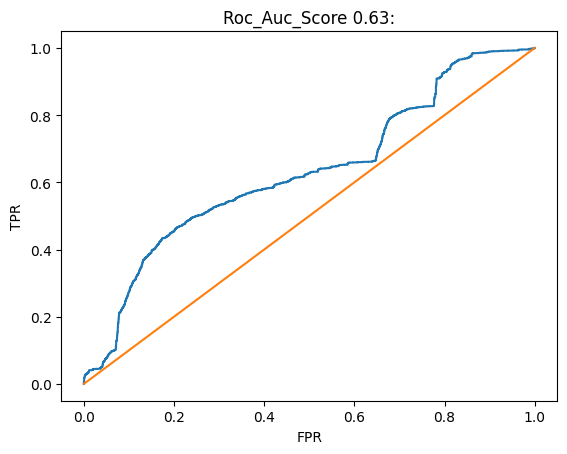

In [66]:
# Let apply SVM Classifier
from sklearn.svm import SVC
svc=SVC(probability=True) # set probability to True
model_svc=svc.fit(xtrain,ytrain)
y_pred_svc=model_svc.predict(xtest)
y_pred_svc_proba=model_svc.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_svc))
print('F1 score:',f1_score(ytest,y_pred_svc))
print('Classification Report:\n',classification_report(ytest,y_pred_svc))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_svc_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_svc_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Cat Boost

Learning rate set to 0.043402
0:	learn: 0.6590419	total: 52.2ms	remaining: 52.2s
1:	learn: 0.6319923	total: 57.8ms	remaining: 28.8s
2:	learn: 0.6105301	total: 63ms	remaining: 20.9s
3:	learn: 0.5899873	total: 68.5ms	remaining: 17.1s
4:	learn: 0.5729768	total: 73.9ms	remaining: 14.7s
5:	learn: 0.5564065	total: 79.8ms	remaining: 13.2s
6:	learn: 0.5433581	total: 85.2ms	remaining: 12.1s
7:	learn: 0.5298211	total: 90.7ms	remaining: 11.2s
8:	learn: 0.5181167	total: 96.2ms	remaining: 10.6s
9:	learn: 0.5064230	total: 101ms	remaining: 10s
10:	learn: 0.4967225	total: 107ms	remaining: 9.57s
11:	learn: 0.4883190	total: 112ms	remaining: 9.22s
12:	learn: 0.4804285	total: 117ms	remaining: 8.91s
13:	learn: 0.4734478	total: 123ms	remaining: 8.64s
14:	learn: 0.4666052	total: 127ms	remaining: 8.37s
15:	learn: 0.4596580	total: 133ms	remaining: 8.17s
16:	learn: 0.4542965	total: 138ms	remaining: 8s
17:	learn: 0.4496777	total: 143ms	remaining: 7.8s
18:	learn: 0.4450450	total: 148ms	remaining: 7.65s
19:	learn:

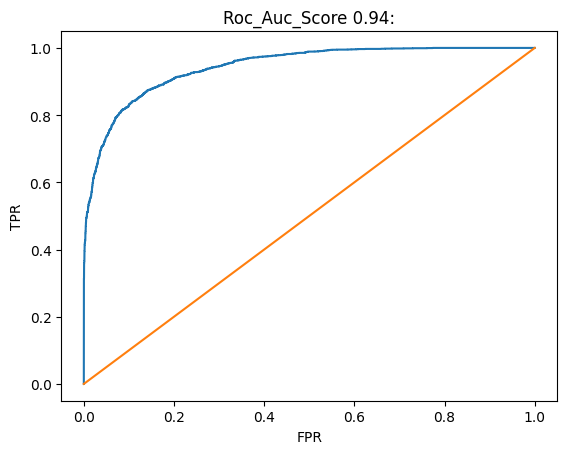

In [68]:
# Lets Apply CatBoost
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
model_cat=cat.fit(xtrain,ytrain)
y_pred_cat=model_cat.predict(xtest)
y_pred_cat_proba=model_cat.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_cat))
print('F1 score:',f1_score(ytest,y_pred_cat))
print('Classification Report:\n',classification_report(ytest,y_pred_cat))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_cat_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_cat_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Result Summary
* After fitting different ML algorithims i find out that the RandomForest Classifeir is providing the best accuracy with highest f1_score as compared to others model.So i will choose my final model to take to the production as **RandomForest Classifier**.

### Dealing with Imbalanced Dataset

In [75]:
# Lets Balanced the Target Class and Fit the Final Model
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=10)
smote_x,smote_y=smote.fit_resample(X,y)

In [76]:
x_train,x_test,y_train,y_test=train_test_split(smote_x,smote_y,test_size=0.2,stratify=smote_y,random_state=10)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((39024, 17), (39024,), (9756, 17), (9756,))

Accuracy: 0.8749827705031014
F1 score: 0.8142535326643457
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      4878
           1       0.79      0.84      0.81      2377

    accuracy                           0.87      7255
   macro avg       0.86      0.87      0.86      7255
weighted avg       0.88      0.87      0.88      7255


ROC AUC CURVE


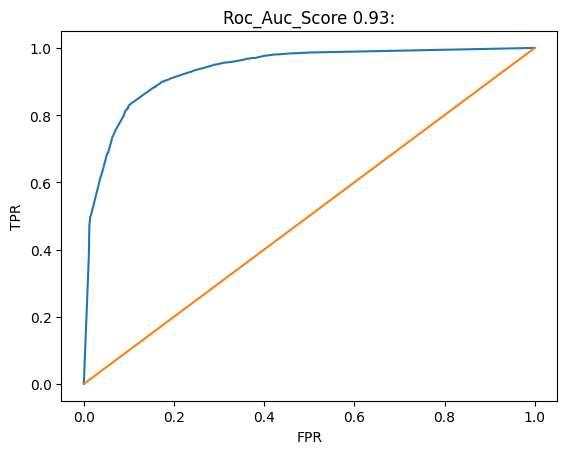

In [79]:
# Lets apply Tuned Decission Tree on Smote Dataset
dt=DecisionTreeClassifier(random_state=10,criterion='gini',max_depth=13,min_samples_split=5)
model_dt=dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(xtest)
y_pred_dt_proba=model_dt.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_dt))
print('F1 score:',f1_score(ytest,y_pred_dt))
print('Classification Report:\n',classification_report(ytest,y_pred_dt))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_dt_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_dt_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Accuracy: 0.9226740179186768
F1 score: 0.8859987807356228
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      4878
           1       0.86      0.92      0.89      2377

    accuracy                           0.92      7255
   macro avg       0.91      0.92      0.91      7255
weighted avg       0.93      0.92      0.92      7255


ROC AUC CURVE


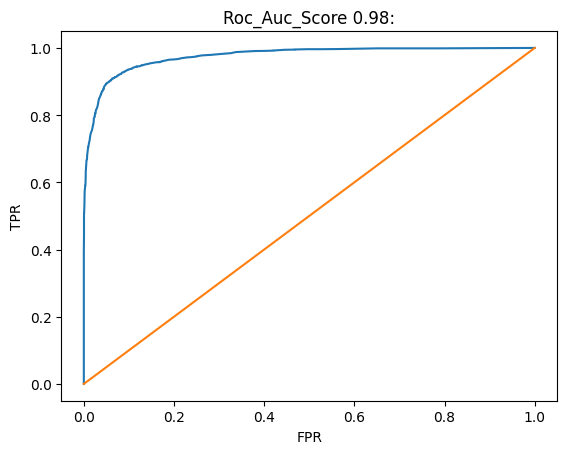

In [80]:
# Lets Apply Random Forest Classifier Model on Smote Dataset
rf=RandomForestClassifier(random_state=10)
model_rf=rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(xtest)
y_pred_rf_proba=model_rf.predict_proba(xtest)[:,1]
print('Accuracy:',accuracy_score(ytest,y_pred_rf))
print('F1 score:',f1_score(ytest,y_pred_rf))
print('Classification Report:\n',classification_report(ytest,y_pred_rf))
print()
print('ROC AUC CURVE')
fpr,tpr,thres=roc_curve(ytest,y_pred_rf_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc_Auc_Score %.2f:'%roc_auc_score(ytest,y_pred_rf_proba))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Observataion:
* So after applying oversampling technique SMOTE in the dataset the accuracy has been significantly improved as comapred to the prevoius one so i will choosethis model as my final model

### Cross Valiadation of Final Model

In [82]:
# cross validate the Final Model
from sklearn.model_selection import StratifiedKFold,cross_val_score
CV=StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
score=cross_val_score(model_rf,smote_x,smote_y,scoring='f1',cv=CV,error_score='raise',n_jobs=-1)
print(score)
print('Mean Score:',np.mean(score))

[0.91230959 0.92114807 0.91613303 0.91781532 0.91900792]
Mean Score: 0.9172827864508429


### Final Model taken to Production

In [83]:
# Lets fit the final Model and Take it to production
import joblib
rf=RandomForestClassifier(random_state=10)
model_rf=rf.fit(smote_x,smote_y)
joblib.dump(rf,'hotel_cancellation_prediction_random_forest.pkl')
loaded_model=joblib.load('hotel_cancellation_prediction_random_forest.pkl')